<a href="https://colab.research.google.com/github/yeonghun00/real-estate/blob/main/market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

상승신호

- 미분양 최고점 찍고 감소세 (1년 이상)
- 거래량 최저 찍고 상승세 (1년 이상)
- 

- 거래량/가격동향 => 성장 지역
- 주택연령별 => 리모델링/재건축 인기도
- 주택크기별 => 끝물, 대형주택 인기도

In [1]:
# korean font
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip'
!unzip "NotoSansCJKkr-hinted.zip"
!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

--2022-11-10 14:23:56--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.217.128, 2607:f8b0:400c:c13::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M   134MB/s    in 0.9s    

2022-11-10 14:23:57 (134 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: NotoSansCJKkr-Th

In [2]:
from matplotlib import font_manager, rc
font_fname = '/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf'
font_manager.fontManager.addfont(font_fname)
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)
font_manager._rebuild()

*   합계
*   관할시군구내 : 해당 시군구 거주자 동일 지역 거래 (실소유)
*   관할시도내 : 해당 시도 거주자 동일 지역 거래 (실소유)
*   관할시도외_서울 : 서울 거주자 해당 지역 걸래 (투자)
*   관할시도외_기타 : 서울 외 거주자 해당 지역 거래 (투자)




In [3]:
import pandas as pd
import requests

url = 'https://www.reb.or.kr/r-one/statistics/excelDownLoadAllType2.do?statCd=LHT_64040&lhtSubGbn=06&dealObj=04&category=&landSrchGbn=CNT&researchDate=&regionCd' #데이터 전부
response = requests.get(url, headers ={'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'})

In [28]:
import io
data = response.content
data = io.BytesIO(data)
df = pd.read_excel(data)

In [29]:
df.columns = df.iloc[9]
df = df[10:]
df = df.T.ffill().T.ffill()
df = df.replace('-', 0)

In [30]:
from datetime import datetime
df = df.rename(columns=dict(zip(df.columns[4:], [datetime.strptime(x, '%Y년 %m월') for x in df.columns[4:]])))

In [31]:
c = df.iloc[:, [0,1,2]]
c.columns = ['시도', '시군','구']
loc = ['_'.join(list(dict.fromkeys(([c.loc[x][y] for y in ['시도', '시군', '구']])))) for x in c.index]

In [32]:
df = df.iloc[: , 3:]
df.insert(loc=0, column='지역', value=loc)
df.head()

9,지역,매입자거주지,2006-01-01 00:00:00,2006-02-01 00:00:00,2006-03-01 00:00:00,2006-04-01 00:00:00,2006-05-01 00:00:00,2006-06-01 00:00:00,2006-07-01 00:00:00,2006-08-01 00:00:00,...,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00
10,전국,합계,77173.0,103718.0,133120.0,118127.0,121835.0,108639.0,91636.0,83938.0,...,101766.0,87825.0,85733.0,89915.0,104380.0,96979.0,88166.0,65921.0,72603.0,57103.0
11,전국,관할시군구내,43355.0,59383.0,73160.0,64991.0,63991.0,56417.0,46492.0,42607.0,...,47739.0,41755.0,45126.0,43043.0,49105.0,44602.0,42941.0,32601.0,37396.0,28956.0
12,전국,관할시도내,19608.0,25040.0,34088.0,29980.0,32173.0,30089.0,25484.0,22413.0,...,25605.0,24027.0,19147.0,22748.0,27480.0,23539.0,22868.0,16160.0,17133.0,14225.0
13,전국,관할시도외_서울,4914.0,6438.0,9656.0,8250.0,9444.0,7880.0,7360.0,6990.0,...,8229.0,6729.0,5892.0,6135.0,8126.0,8222.0,6140.0,4123.0,5574.0,3701.0
14,전국,관할시도외_기타,9296.0,12857.0,16216.0,14906.0,16227.0,14253.0,12300.0,11928.0,...,20193.0,15314.0,15568.0,17989.0,19669.0,20616.0,16217.0,13037.0,12500.0,10221.0


In [33]:
city = '서울'
loc = set(df[df['지역'].str.contains(city)]['지역'])
loc.remove(city)

In [34]:
def get_data(loc=['전국'], buyer=['합계'], rank=10):
  if type(loc) == str : loc = [loc]
  if type(buyer) == str : buyer = [buyer]
  t = df.loc[df['지역'].isin(loc)]
  t = t.loc[t['매입자거주지'].isin(buyer)]
  t = t.rename(index=dict(zip((t['지역'] + '_' + t['매입자거주지']).index, (t['지역'] + '_' + t['매입자거주지']))))
  t = t.drop(columns=['지역', '매입자거주지'])
  r = t.sum(axis=1).sort_values(ascending=False).index[:rank]
  return t.loc[r].T

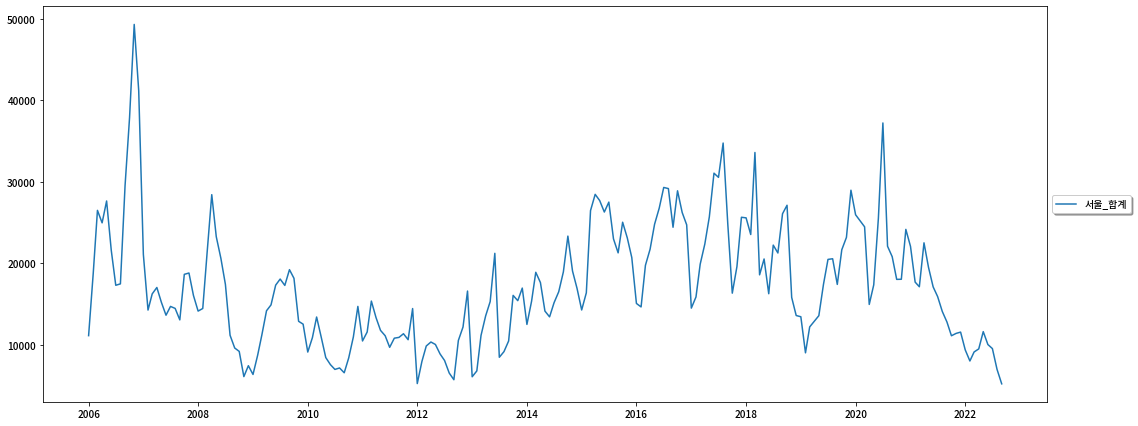

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(2, 1, 1)

data = get_data('서울', '합계')
plt.plot(data)
ax.legend(data, loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)

plt.show()

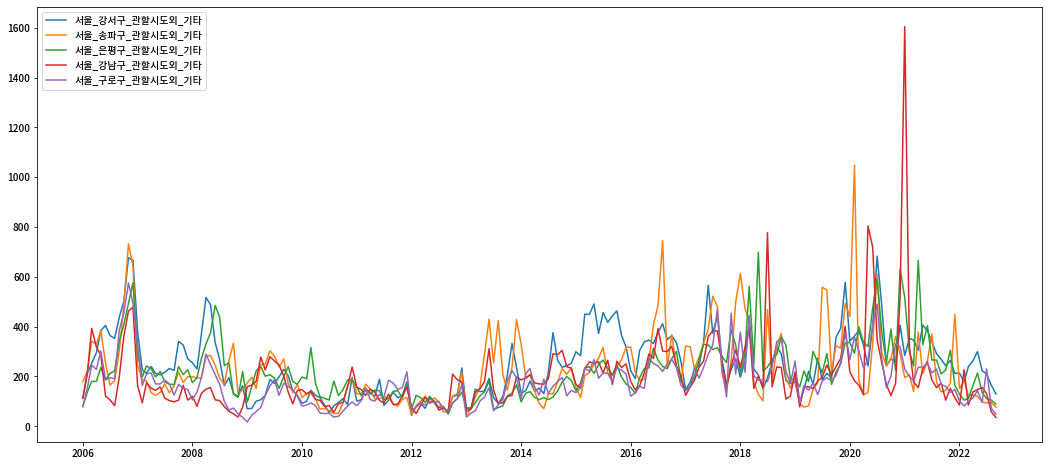

In [36]:
import matplotlib.pyplot as plt

city = '서울'
loc = set(df[df['지역'].str.contains(city)]['지역'])
loc.remove(city)
data = get_data(loc, ['관할시도외_기타'], 5)

plt.figure(figsize=(18,8))
plt.plot(data)
plt.legend(data)
plt.show()

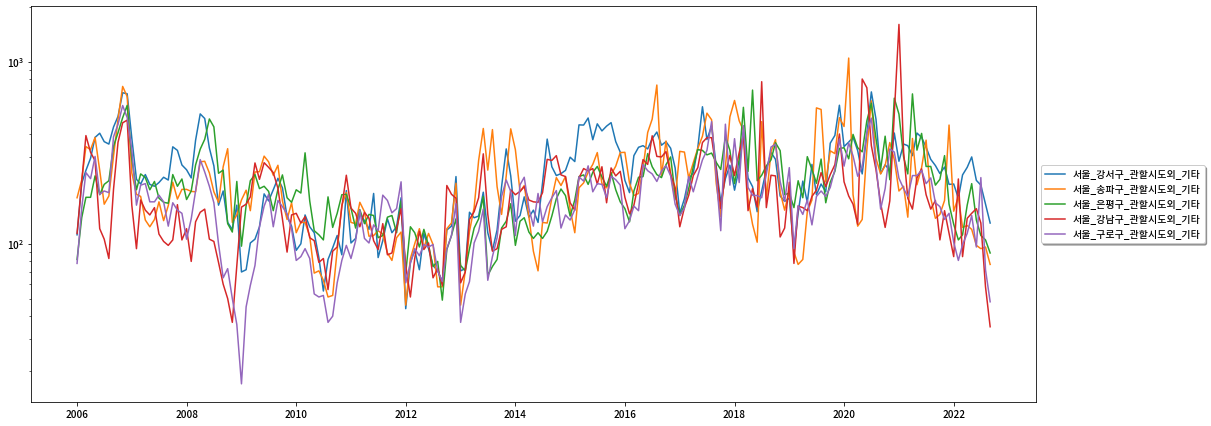

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(2, 1, 1)
ax.plot(data)
ax.legend(data, loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)

ax.set_yscale('log')

plt.show()

In [14]:
rank = pd.DataFrame({data.iloc[-1-x].name : data.iloc[-1]/data.iloc[-1-x].sort_values() for x in [1,3,6,12,24]})
rank

,2022-08-01,2022-06-01,2022-03-01,2021-09-01,2020-09-01
서울_강남구_관할시도외_기타,0.603448,0.224359,0.411765,0.202312,0.209581
서울_강서구_관할시도외_기타,0.787879,0.582960,0.543933,0.483271,0.534979
서울_구로구_관할시도외_기타,0.666667,0.500000,0.484848,0.285714,0.309677
서울_송파구_관할시도외_기타,0.802083,0.785714,0.626016,0.557971,0.318182
서울_은평구_관할시도외_기타,0.847619,0.659259,0.794643,0.423810,0.346304


In [15]:
rank.iloc[:, 0].sort_values()

서울_강남구_관할시도외_기타    0.603448
서울_구로구_관할시도외_기타    0.666667
서울_강서구_관할시도외_기타    0.787879
서울_송파구_관할시도외_기타    0.802083
서울_은평구_관할시도외_기타    0.847619
Name: 2022-08-01 00:00:00, dtype: float64

- 거래량 총합 많은 순만 뽑아오기
- 저거 레전드 위치 좀 맵플롯도 깔끔하게
- 연도별 합
- 서브 df 뽑아오는거 좀 더 이쁜 함수로 만들기

https://stat.molit.go.kr/portal/cate/statView.do?hRsId=32&hFormId=2082&hSelectId=2086&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&month_yn=N&sFormId=2082&sStart=2001&sEnd=2021&sStyleNum=713&sDivEng=N&EXPORT=

In [16]:
from google.colab import files
uploaded = files.upload()

Saving 시·군·구별+미분양현황_2082_128_20221110225033.csv to 시·군·구별+미분양현황_2082_128_20221110225033.csv


In [59]:
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded)[0]]))

In [60]:
df = df.sort_values(by='월(Monthly)')
df.index = [datetime.strptime(x, '%Y-%m') for x in df['월(Monthly)']]
df.drop(columns=['증감','증감율','구성비','누계','누계구성비','LEVEL1', '월(Monthly)'], inplace=True)

In [64]:
df.index

DatetimeIndex(['2000-12-01', '2000-12-01', '2000-12-01', '2000-12-01',
               '2000-12-01', '2000-12-01', '2000-12-01', '2000-12-01',
               '2000-12-01', '2000-12-01',
               ...
               '2022-09-01', '2022-09-01', '2022-09-01', '2022-09-01',
               '2022-09-01', '2022-09-01', '2022-09-01', '2022-09-01',
               '2022-09-01', '2022-09-01'],
              dtype='datetime64[ns]', length=46793, freq=None)

In [65]:
# 2007년 부터 데이터로

df = df.fillna(0)
df = df[df.index > '2007-01']

In [72]:
data = df[(df['구분'] == '경기') & (df['시군구'] == '계')]['값']

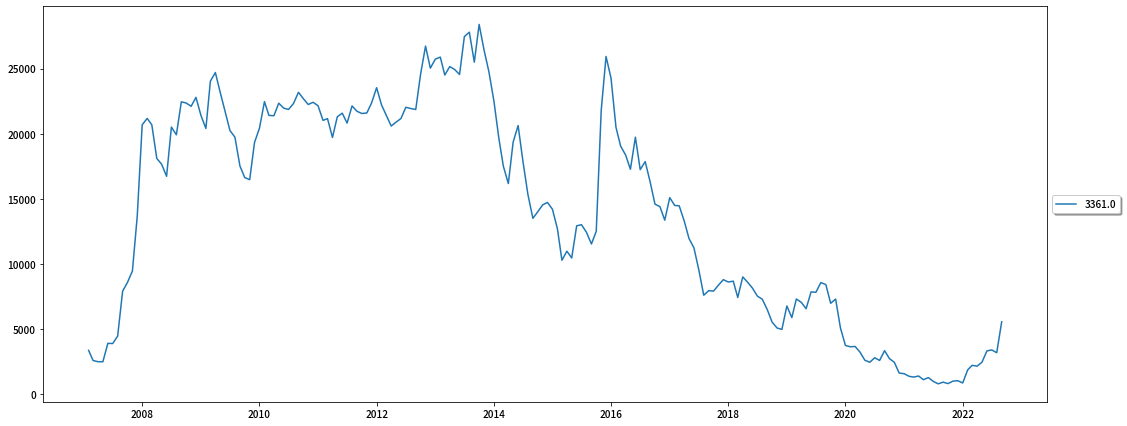

In [73]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(2, 1, 1)
ax.plot(data)
ax.legend(data, loc='center left',  bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)

plt.show()

In [24]:
data

월(Monthly)
2007-02    590.0
2007-03    687.0
2007-04    685.0
2007-05    704.0
2007-06    778.0
           ...  
2022-05    688.0
2022-06    719.0
2022-07    592.0
2022-08    610.0
2022-09    719.0
Name: 값, Length: 188, dtype: float64